# Classification(MNIST)

## Data import

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
mnist['url']

'https://www.openml.org/d/554'

In [3]:
X,y=mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [4]:
import numpy as np
import pandas as pd

In [5]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

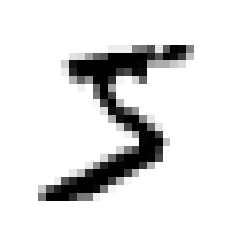

In [6]:
some_digit=X.iloc[0].values
# iloc: index location
# loc : location
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap=mpl.cm.binary)
# colormap
# cmap='binary'해도 된다.s

plt.axis("off")

plt.show()

In [7]:
y=y.astype(np.uint8)

In [8]:
X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [9]:
# True / False 이진 클래스로 나눔
y_train_5=(y_train==5)
y_test_5=(y_test==5)

## 확률적 경사하강법 SGDClassifier

In [10]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
# max_iter = default =1000. 반복적으로 학습하는 알고리즘.
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [11]:
# 첫번째 데이터 예측 -> True
sgd_clf.predict([some_digit])

array([ True])

### CV Score

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train,cv=3,scoring="accuracy")

### K fold Score

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42,shuffle=True)
#skfolds 를 넘기면, n_splits 가 cv 매개변수의 역할을한다.
for train_index, test_index in skfolds.split(X_train,y_train_5):
    clone_clf=clone(sgd_clf)
    print(train_index)
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_test.iloc[test_index]
    y_test_fold = y_test[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred=clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred==y_test_fold)
    print(n_correct/len(y_pred))

In [ ]:
X_train.iloc[[0 ,1, 2]]

In [ ]:
X_train